In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!apt install gdal-bin

!gdalinfo --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 1s (3,492 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 121752 files and direc

In [23]:
import os

path = "/content/drive/MyDrive/RUH_all_bands"


RUH_all_bands =  os.listdir(path)


RUH_all_bands

['RUH-All-Bands_2019-01-14.tif',
 'RUH-All-Bands_2019-02-13.tif',
 'RUH-All-Bands_2018-12-15.tif',
 'RUH-All-Bands_2019-03-15.tif',
 'RUH-All-Bands_2019-04-14.tif',
 'RUH-All-Bands_2019-07-13.tif',
 'RUH-All-Bands_2019-06-13.tif',
 'RUH-All-Bands_2019-05-14.tif',
 'RUH-All-Bands_2019-08-12.tif',
 'RUH-All-Bands_2019-10-11.tif',
 'RUH-All-Bands_2019-09-11.tif',
 'RUH-All-Bands_2019-11-10.tif',
 'RUH-All-Bands_2020-01-09.tif',
 'RUH-All-Bands_2019-12-10.tif',
 'RUH-All-Bands_2020-02-08.tif',
 'RUH-All-Bands_2020-04-08.tif',
 'RUH-All-Bands_2020-03-09.tif',
 'RUH-All-Bands_2020-06-07.tif',
 'RUH-All-Bands_2020-05-08.tif',
 'RUH-All-Bands_2020-07-07.tif',
 'RUH-All-Bands_2020-09-05.tif',
 'RUH-All-Bands_2020-10-05.tif',
 'RUH-All-Bands_2020-08-06.tif',
 'RUH-All-Bands_2020-11-04.tif',
 'RUH-All-Bands_2021-01-03.tif',
 'RUH-All-Bands_2020-12-04.tif',
 'RUH-All-Bands_2021-02-02.tif',
 'RUH-All-Bands_2021-03-04.tif',
 'RUH-All-Bands_2021-05-03.tif',
 'RUH-All-Bands_2021-06-02.tif',
 'RUH-All-

In [28]:
  # 8 4 ndvi
def prr(name):
  print(f"/content/drive/MyDrive/RGB_RUH_all_bands/RGB_{name.split('.')[0]}.png")
prr(RUH_all_bands[0].split(".")[0])

/content/drive/MyDrive/RGB_RUH_all_bands/RGB_RUH-All-Bands_2019-01-14.png


In [ ]:
# turn all images to rgb png images

In [31]:
from osgeo import gdal
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


def tiff2RGB(filename):
  dataset = gdal.Open(f"/content/drive/MyDrive/RUH_all_bands/{filename}")

  red = dataset.GetRasterBand(4).ReadAsArray().astype(float)
  green = dataset.GetRasterBand(3).ReadAsArray().astype(float)
  blue = dataset.GetRasterBand(2).ReadAsArray().astype(float)

  red[np.isnan(red) | np.isinf(red)] = 0
  green[np.isnan(green) | np.isinf(green)] = 0
  blue[np.isnan(blue) | np.isinf(blue)] = 0

  def normalize(array):
      array_min, array_max = array.min(), array.max()
      return (array - array_min) / (array_max - array_min) if array_max - array_min > 0 else array

  red_normalized = normalize(red)
  green_normalized = normalize(green)
  blue_normalized = normalize(blue)

  red_8bit = (red_normalized * 255).astype(np.uint8)
  green_8bit = (green_normalized * 255).astype(np.uint8)
  blue_8bit = (blue_normalized * 255).astype(np.uint8)

  rgb_8bit = np.stack((red_8bit, green_8bit, blue_8bit), axis=2)

  image = Image.fromarray(rgb_8bit)

  image.save(f"/content/drive/MyDrive/RGB_RUH_all_bands/RGB_{filename.split('.')[0]}.png")


In [32]:
for i in range(len(RUH_all_bands)):
  tiff2RGB(RUH_all_bands[i])

In [53]:
def create_mask(image_path):
  fullimg = gdal.Open(f"/content/drive/MyDrive/RUH_all_bands/{image_path}")

  nir = fullimg.GetRasterBand(8).ReadAsArray().astype(np.float32)
  red = fullimg.GetRasterBand(4).ReadAsArray().astype(np.float32)

  ndvi = (nir - red) / (nir + red)

  ndvi = ndvi[:6144, :6144]

  width, height = ndvi.shape

  image_mask = np.zeros((height, width), dtype=np.uint8)


  for y in range(height):
    for x in range(width):
      if ndvi[x][y] >= 0.66:
        image_mask[x][y] = 255
      elif ndvi[x][y] >= 0.33:
        image_mask[x][y] = 170
      elif ndvi[x][y] >= 0.111:
        image_mask[x][y] = 85
      else:
        image_mask[x][y] = 0

  mask = Image.fromarray(image_mask)
  mask.save(f'/content/drive/MyDrive/MASK_NDVI_RUH/MASK_{image_path.split(".")[0]}.png')



In [ ]:
array_image = create_mask("RUH-All-Bands_2018-12-15.tif")

data = Image.fromarray(array_image)

data.save(f'/content/drive/MyDrive/MASK_{image_path.split(".")[0]}.png')

In [ ]:
for i in range(len(RUH_all_bands)):
  create_mask((RUH_all_bands[i]))
  print(i," is Done !")

0  is Done !
1  is Done !
2  is Done !
3  is Done !
4  is Done !
5  is Done !
6  is Done !
7  is Done !
8  is Done !
9  is Done !
10  is Done !
11  is Done !
12  is Done !
13  is Done !
14  is Done !
15  is Done !
16  is Done !
17  is Done !
18  is Done !
19  is Done !
20  is Done !
21  is Done !
22  is Done !
23  is Done !
24  is Done !
25  is Done !
26  is Done !
27  is Done !
28  is Done !
29  is Done !
30  is Done !
31  is Done !
32  is Done !
33  is Done !
34  is Done !
35  is Done !
36  is Done !
37  is Done !
38  is Done !
39  is Done !
40  is Done !
41  is Done !
42  is Done !
43  is Done !
44  is Done !
45  is Done !
46  is Done !
47  is Done !


In [ ]:
for i in range(48,60):
  create_mask((RUH_all_bands[i]))
  print(i," is Done !")

In [ ]:
RUH_all_bands

In [43]:
fullimg = gdal.Open("/content/drive/MyDrive/test/RUH-All-Bands_2018-12-15.tif")

nir = fullimg.GetRasterBand(8).ReadAsArray().astype(np.float32)
red = fullimg.GetRasterBand(4).ReadAsArray().astype(np.float32)

ndvi = (nir - red) / (nir + red)

ndvi.shape

(6345, 6445)

In [44]:
type(ndvi)

numpy.ndarray

In [42]:
image = np.array(Image.open("/content/drive/MyDrive/RUH-All-Bands_2018-12-15.png"))
print(image.shape)
image = image[:6144, :6144]
width, height , _ = image.shape
print("width : ",width , " height : ",height)
image_mask = np.zeros((height, width), dtype=np.uint8)

red = red_ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
nir = nir_ds.GetRasterBand(1).ReadAsArray().astype(np.float32)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)


# for y in range(height):
#   for x in range(width):
#     pixel_value = image.getpixel((x, y))

#     if x == 5:
#       break
#   break

(6345, 6445, 3)
width :  6144  height :  6144


In [ ]:
from PIL import Image

image_path = '/content/drive/MyDrive/RUH-All-Bands_2018-12-15.png'
image = Image.open(image_path)

def histo_plot(img):

  r_0_to_255 = list(range(256))
  g_0_to_255 = list(range(256))
  b_0_to_255 = list(range(256))


  for y in range(image.height):
    for x in range(image.width):
      r, g, b = image.getpixel((x, y))

      r_0_to_255[r] += 1
      g_0_to_255[g] += 1
      b_0_to_255[b] += 1

  import matplotlib.pyplot as plt

  def plot_histogram_for_list(data,title):

      plt.bar(range(len(data)), data)

      plt.xlabel('Pixel')
      plt.ylabel('Frequency')
      plt.title(title)

      plt.show()

  plot_histogram_for_list(r_0_to_255,"red")
  plot_histogram_for_list(g_0_to_255,"green")
  plot_histogram_for_list(b_0_to_255,"blue")


In [ ]:
for i in range(len(r_0_to_255)):
  if g_0_to_255[i] > 1:
    print(i , "Fr : " , r_0_to_255[i])

In [ ]:
import numpy as np
from PIL import Image

def histogram_equalization(image):
    image_array = np.array(image)

    histogram, bins = np.histogram(image_array.flatten(), bins=256, range=(0,256))

    cdf = histogram.cumsum()

    cdf_normalized = cdf / float(cdf.max())

    equalized_image = np.interp(image_array.flatten(), bins[:-1], cdf_normalized * 255).reshape(image_array.shape)

    equalized_image = equalized_image.astype(np.uint8)

    equalized_image_pil = Image.fromarray(equalized_image)

    return equalized_image_pil


image_str  = histogram_equalization(image)
image_str

In [ ]:
image_str.save("/content/drive/MyDrive/test.png")

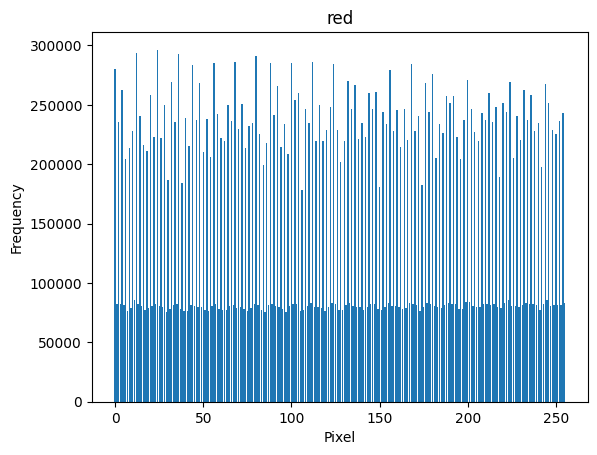

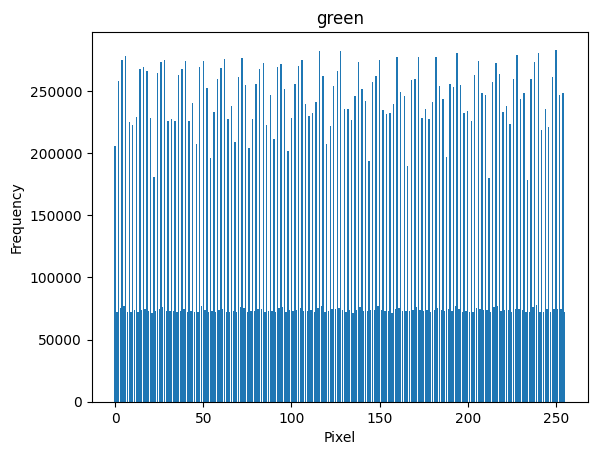

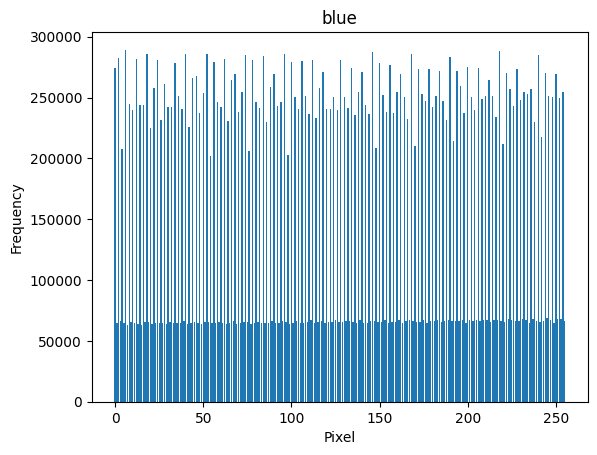

In [11]:
histo_plot(image)


In [12]:
histo_plot(image_str)

NameError: name 'image_str' is not defined

In [13]:

print("lol")

lol
